<a href="https://colab.research.google.com/github/RaphaPUC/MVP/blob/main/11_terceiro_modelo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise de sentimento - base IMDB

Etapas:

- Carregar dados
- Definir modelo Keras
- Compilar modelo Keras
- Ajustar (fit) modelo Keras
- Avaliar (evalute) modelo Keras
- Faça previsões (predict)

## Carregar dados

In [ ]:
import os

os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras

In [ ]:
data = keras.datasets.imdb

(x_train, y_train), (x_test, y_test) = data.load_data()

17464789/17464789 [==============================] - 0s 0us/step


In [ ]:
x_train.shape, y_train.shape

((25000,), (25000,))

In [ ]:
x_test.shape, y_test.shape

((25000,), (25000,))

In [ ]:
x_train[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 22665,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 21631,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 19193,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 10311,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 31050,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 12118,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5

In [ ]:
len(x_train[0])

218

In [ ]:
y_train[:5]

array([1, 0, 0, 1, 0])

In [ ]:
np.unique(y_train, return_counts=True)

(array([0, 1]), array([12500, 12500]))

In [ ]:
word_index = data.get_word_index()
# word_index

1641221/1641221 [==============================] - 0s 0us/step


In [ ]:
len(word_index)

88584

In [ ]:
word_index["the"]

1

In [ ]:
for chave, valor in word_index.items():
    if valor == 1:
        print(chave)

the


In [ ]:
for review in x_train[:5]:
    print(len(review))

218
189
141
550
147


No contexto de processamento de linguagem natural e análise de dados de texto, como no projeto com o dataset do IMDB, um "token" refere-se a uma unidade individual de dados ou palavra. Na tokenização, o texto é dividido em tais unidades (tokens), que podem ser palavras, caracteres ou subpalavras. Este processo é fundamental para transformar o texto bruto em uma forma que os modelos de machine learning podem entender e processar. Por exemplo, uma frase é dividida em palavras ou partes menores, e cada uma dessas partes é tratada como um token único.

Considere a frase "Aprendendo processamento de linguagem natural". Na tokenização, esta frase seria dividida em tokens individuais. Cada palavra representa um token:

- Token 1: "Aprendendo"
- Token 2: "processamento"
- Token 3: "de"
- Token 4: "linguagem"
- Token 5: "natural"

Neste exemplo, a frase original é decomposta em palavras isoladas, cada uma considerada um token.

Um exemplo onde um token não é necessariamente uma palavra pode ser encontrado na tokenização baseada em caracteres ou sílabas. Por exemplo, na frase "Incrível", a tokenização por sílabas resultaria nos tokens "In", "crí", "vel". Aqui, cada sílaba é tratada como um token distinto, ao invés de cada palavra inteira. Este tipo de tokenização pode ser útil em tarefas de processamento de linguagem natural que exigem uma análise mais detalhada do texto, como na compreensão de padrões fonéticos ou na análise de idiomas com estruturas de palavras complexas.

- PAD é o token usado para preenchimento. Nós preenchemos todas as sequências para o mesmo comprimento, que é o comprimento da sequência mais longa.
- START é o token usado para marcar o início de uma sequência.
- UNK é o token usado para marcar palavras desconhecidas (palavras que não estão no vocabulário).
- UNUSED é o token usado para preencher as posições não utilizadas em uma sequência.

In [ ]:
word_index = {chave: (valor + 3) for chave, valor in word_index.items()}

In [ ]:
word_index["<PAD>"] = 0
word_index["<START>"] = 1
word_index["<UNK>"] = 2
word_index["<UNUSED>"] = 3

In [ ]:
for chave, valor in word_index.items():
    if valor == 1:
        print(chave)

<START>


In [ ]:
def decode_review(text, index):
    reverse_index = {value: key for key, value in index.items()}
    return " ".join([reverse_index.get(value, "<UNK>") for value in text])

In [ ]:
decode_review(x_train[0], word_index)

"<START> this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert redford's is an amazing actor and now the same being director norman's father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for retail and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also congratulations to the two little boy's that played the part's of norman and paul they were just brilliant children are often left out of the praising list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and sh

In [ ]:
import textwrap


def print_review(text, width=50):
    wrapper = textwrap.TextWrapper(width=width)
    print(wrapper.fill(text))

In [ ]:
print_review(decode_review(x_train[0], word_index))

<START> this film was just brilliant casting
location scenery story direction everyone's really
suited the part they played and you could just
imagine being there robert redford's is an amazing
actor and now the same being director norman's
father came from the same scottish island as
myself so i loved the fact there was a real
connection with this film the witty remarks
throughout the film were great it was just
brilliant so much that i bought the film as soon
as it was released for retail and would recommend
it to everyone to watch and the fly fishing was
amazing really cried at the end it was so sad and
you know what they say if you cry at a film it
must have been good and this definitely was also
congratulations to the two little boy's that
played the part's of norman and paul they were
just brilliant children are often left out of the
praising list i think because the stars that play
them all grown up are such a big profile for the
whole film but these children are amazing and
sho

https://www.tensorflow.org/api_docs/python/tf/keras/utils/pad_sequences

In [ ]:
print_review(decode_review(x_train[3], word_index))

<START> the scots excel at storytelling the
traditional sort many years after the event i can
still see in my mind's eye an elderly lady my
friend's mother retelling the battle of culloden
she makes the characters come alive her passion is
that of an eye witness one to the events on the
sodden heath a mile or so from where she lives br
br of course it happened many years before she was
born but you wouldn't guess from the way she tells
it the same story is told in bars the length and
breadth of scotland as i discussed it with a
friend one night in mallaig a local cut in to give
his version the discussion continued to closing
time br br stories passed down like this become
part of our being who doesn't remember the stories
our parents told us when we were children they
become our invisible world and as we grow older
they maybe still serve as inspiration or as an
emotional reservoir fact and fiction blend with
aspiration role models warning stories archetypes
magic and mystery br br my n

In [ ]:
x_train = keras.utils.pad_sequences(
    x_train,
    value=word_index["<PAD>"],
    padding="post",
    truncating="post",
    maxlen=256
)

x_test = keras.utils.pad_sequences(
    x_test,
    value=word_index["<PAD>"],
    padding="post",
    truncating="post",
    maxlen=256
)

In [ ]:
print_review(decode_review(x_train[0], word_index))

<START> this film was just brilliant casting
location scenery story direction everyone's really
suited the part they played and you could just
imagine being there robert redford's is an amazing
actor and now the same being director norman's
father came from the same scottish island as
myself so i loved the fact there was a real
connection with this film the witty remarks
throughout the film were great it was just
brilliant so much that i bought the film as soon
as it was released for retail and would recommend
it to everyone to watch and the fly fishing was
amazing really cried at the end it was so sad and
you know what they say if you cry at a film it
must have been good and this definitely was also
congratulations to the two little boy's that
played the part's of norman and paul they were
just brilliant children are often left out of the
praising list i think because the stars that play
them all grown up are such a big profile for the
whole film but these children are amazing and
sho

In [ ]:
x_train[0]

array([    1,    14,    22,    16,    43,   530,   973,  1622,  1385,
          65,   458,  4468,    66,  3941,     4,   173,    36,   256,
           5,    25,   100,    43,   838,   112,    50,   670, 22665,
           9,    35,   480,   284,     5,   150,     4,   172,   112,
         167, 21631,   336,   385,    39,     4,   172,  4536,  1111,
          17,   546,    38,    13,   447,     4,   192,    50,    16,
           6,   147,  2025,    19,    14,    22,     4,  1920,  4613,
         469,     4,    22,    71,    87,    12,    16,    43,   530,
          38,    76,    15,    13,  1247,     4,    22,    17,   515,
          17,    12,    16,   626,    18, 19193,     5,    62,   386,
          12,     8,   316,     8,   106,     5,     4,  2223,  5244,
          16,   480,    66,  3785,    33,     4,   130,    12,    16,
          38,   619,     5,    25,   124,    51,    36,   135,    48,
          25,  1415,    33,     6,    22,    12,   215,    28,    77,
          52,     5,

In [ ]:
print_review(decode_review(x_train[3], word_index))

<START> the scots excel at storytelling the
traditional sort many years after the event i can
still see in my mind's eye an elderly lady my
friend's mother retelling the battle of culloden
she makes the characters come alive her passion is
that of an eye witness one to the events on the
sodden heath a mile or so from where she lives br
br of course it happened many years before she was
born but you wouldn't guess from the way she tells
it the same story is told in bars the length and
breadth of scotland as i discussed it with a
friend one night in mallaig a local cut in to give
his version the discussion continued to closing
time br br stories passed down like this become
part of our being who doesn't remember the stories
our parents told us when we were children they
become our invisible world and as we grow older
they maybe still serve as inspiration or as an
emotional reservoir fact and fiction blend with
aspiration role models warning stories archetypes
magic and mystery br br my n

In [ ]:
for review in x_train[:5]:
    print(len(review))

256
256
256
256
256


In [ ]:
x_train.shape

(25000, 256)

## Definir modelo Keras

### Embedding

https://www.tensorflow.org/api_docs/python/tf/keras/layers/Embedding

O Embedding no Keras funciona como um tradutor que transforma números, cada um representando uma palavra, em vetores de números reais em um espaço multidimensional. Cada vetor representa uma palavra de maneira única, capturando nuances de seu significado e relação com outras palavras. Por exemplo, na representação vetorial, palavras com significados semelhantes, como "feliz" e "alegre", ficarão próximas no espaço vetorial. Esses vetores são aprendidos durante o treinamento do modelo, permitindo que a máquina compreenda e processe textos de maneira mais eficaz. Isso é fundamental em tarefas como análise de sentimentos ou tradução automática, onde a compreensão do contexto e das nuances das palavras é crucial.

![Screenshot 2023-12-21 143449.png](attachment:5da53b07-30e6-4280-aa90-a045efdd64c8.png)

### RNNs

Uma Rede Neural Recorrente (RNN) é um tipo de rede neural projetada para processar sequências, como dados de séries temporais ou texto. RNNs são únicas porque mantêm uma memória interna de entradas anteriores, permitindo-lhes capturar informações sobre a história da sequência. No entanto, RNNs padrão frequentemente têm dificuldade em aprender dependências de longo alcance devido ao problema do gradiente desaparecendo.

![RNN-rolled.png](attachment:d50fec3c-e357-4e4a-9b4c-3de120ab84f4.png)

LSTM, ou Memória de Longo e Curto Prazo, é um tipo especial de RNN que aborda essa questão. Ela inclui mecanismos chamados portões que regulam o fluxo de informações, tornando-a capaz de lembrar e utilizar informações ao longo de sequências muito mais longas. Isso torna as LSTMs mais eficazes para tarefas onde entender o contexto estendido é crucial.

![Fully_connected_Recurrent_Neural_Network.webp](attachment:1be8dc9b-e2bf-44cf-9275-bd34354ea5e7.webp)

https://www.tensorflow.org/api_docs/python/tf/keras/layers/LSTM

In [ ]:
model = keras.Sequential()

model.add(keras.layers.InputLayer(input_shape=(256,)))

model.add(keras.layers.Embedding(len(word_index), 64))

model.add(keras.layers.LSTM(64, dropout=0.5))

model.add(keras.layers.Dense(2, activation="sigmoid"))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 256, 64)           5669632   
                                                                 
 lstm (LSTM)                 (None, 64)                33024     
                                                                 
 dense (Dense)               (None, 2)                 130       
                                                                 
Total params: 5702786 (21.75 MB)
Trainable params: 5702786 (21.75 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Compilar modelo Keras

In [ ]:
optimizer = keras.optimizers.Adam(1E-4)
loss = keras.losses.SparseCategoricalCrossentropy()
metric = keras.metrics.SparseCategoricalAccuracy()

model.compile(optimizer=optimizer, loss=loss, metrics=[metric])

## Fit modelo Keras

In [ ]:
history = model.fit(
    x_train,
    y_train,
    epochs=20,
    batch_size=512,
    validation_split=0.2,
    verbose=1,
)

Epoch 1/20
40/40 [==============================] - 59s 1s/step - loss: 0.6930 - sparse_categorical_accuracy: 0.5089 - val_loss: 0.6930 - val_sparse_categorical_accuracy: 0.5046
Epoch 2/20
40/40 [==============================] - 57s 1s/step - loss: 0.6929 - sparse_categorical_accuracy: 0.5119 - val_loss: 0.6929 - val_sparse_categorical_accuracy: 0.5070
Epoch 3/20
40/40 [==============================] - 57s 1s/step - loss: 0.6926 - sparse_categorical_accuracy: 0.5085 - val_loss: 0.6929 - val_sparse_categorical_accuracy: 0.5056
Epoch 4/20
40/40 [==============================] - 56s 1s/step - loss: 0.6924 - sparse_categorical_accuracy: 0.5196 - val_loss: 0.6928 - val_sparse_categorical_accuracy: 0.5052
Epoch 5/20
40/40 [==============================] - 64s 2s/step - loss: 0.6919 - sparse_categorical_accuracy: 0.5203 - val_loss: 0.6927 - val_sparse_categorical_accuracy: 0.4950
Epoch 6/20
40/40 [==============================] - 56s 1s/step - loss: 0.6912 - sparse_categorical_accuracy: 

## Evaluate modelo Keras

In [ ]:
model.evaluate(x_test, y_test)

782/782 [==============================] - 32s 41ms/step - loss: 0.3936 - sparse_categorical_accuracy: 0.8557


[0.39362648129463196, 0.8557199835777283]

## Predict modelo Keras

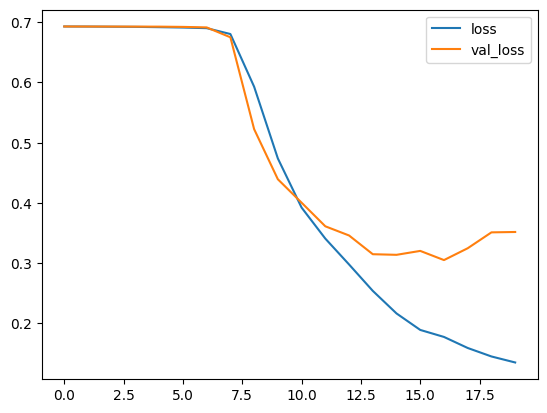

In [ ]:
plt.plot(history.history["loss"], label="loss")
plt.plot(history.history["val_loss"], label="val_loss")
plt.legend()
plt.show()

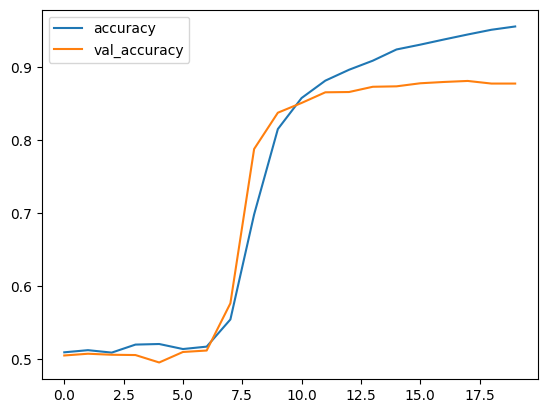

In [ ]:
plt.plot(history.history["sparse_categorical_accuracy"], label="accuracy")
plt.plot(history.history["val_sparse_categorical_accuracy"], label="val_accuracy")
plt.legend()
plt.show()

In [ ]:
for i in range(10):
    # print_review(decode_review(x_test[i], word_index), width=80)
    print("Label: ", y_test[i])
    print("Prediction (sigmoid): ", model.predict(np.expand_dims(x_test[i], axis=0), verbose=0).flatten())
    print("Prediction: ", np.argmax(model.predict(np.expand_dims(x_test[i], axis=0), verbose=0)))
    print()

Label:  0
Prediction (sigmoid):  [0.89036995 0.06253275]
Prediction:  0

Label:  1
Prediction (sigmoid):  [0.09817832 0.9312621 ]
Prediction:  1

Label:  1
Prediction (sigmoid):  [0.09572132 0.9338862 ]
Prediction:  1

Label:  0
Prediction (sigmoid):  [0.6924939  0.27435654]
Prediction:  0

Label:  1
Prediction (sigmoid):  [0.08513365 0.94198585]
Prediction:  1

Label:  1
Prediction (sigmoid):  [0.36414087 0.6646695 ]
Prediction:  1

Label:  1
Prediction (sigmoid):  [0.41798568 0.5994953 ]
Prediction:  1

Label:  0
Prediction (sigmoid):  [0.88111377 0.07072982]
Prediction:  0

Label:  0
Prediction (sigmoid):  [0.08547573 0.9417077 ]
Prediction:  1

Label:  1
Prediction (sigmoid):  [0.59635144 0.3806084 ]
Prediction:  0



In [ ]:
print_review(decode_review(x_test[5], word_index), width=80)

<START> i'm absolutely disgusted this movie isn't being sold all who love this
movie should email disney and increase the demand for it they'd eventually have
to sell it then i'd buy copies for everybody i know everything and everybody in
this movie did a good job and i haven't figured out why disney hasn't put this
movie on dvd or on vhs in rental stores at least i haven't seen any copies this
is a wicked good movie and should be seen by all the kids in the new generation
don't get to see it and i think they should it should at least be put back on
the channel this movie doesn't deserve a cheap download it deserves the real
thing i'm them now this movie will be on dvd <PAD> <PAD> <PAD> <PAD> <PAD> <PAD>
<PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD>
<PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD>
<PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD>
<PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD

In [ ]:
review_good = "The movie was great! The animation and the graphics were out of this world. I would recommend this movie."
review_bad = "The movie was terrible. The animation was poor and the graphics were awful. I would not recommend this movie."

In [ ]:
print_review(review_good)

The movie was great! The animation and the
graphics were out of this world. I would recommend
this movie.


In [ ]:
print_review(review_bad)

The movie was terrible. The animation was poor and
the graphics were awful. I would not recommend
this movie.


In [ ]:
def encode_review(text, index):
    import string
    text = text.translate(str.maketrans("", "", string.punctuation)).lower()
    return [index.get(word, 2) for word in text.split(" ")]

In [ ]:
encode_review(review_good, word_index)

[4, 20, 16, 87, 4, 748, 5, 4, 2876, 71, 46, 7, 14, 182, 13, 62, 386, 14, 20]

In [ ]:
decode_review(encode_review(review_good, word_index), word_index)

'the movie was great the animation and the graphics were out of this world i would recommend this movie'

In [ ]:
review_good = keras.utils.pad_sequences(
    [encode_review(review_good, word_index)],
    value=word_index["<PAD>"],
    padding="post",
    truncating="post",
    maxlen=256
)

review_bad = keras.utils.pad_sequences(
    [encode_review(review_bad, word_index)],
    value=word_index["<PAD>"],
    padding="post",
    truncating="post",
    maxlen=256
)

In [ ]:
review_good

array([[   4,   20,   16,   87,    4,  748,    5,    4, 2876,   71,   46,
           7,   14,  182,   13,   62,  386,   14,   20,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0, 

In [ ]:
review_bad

array([[   4,   20,   16,  394,    4,  748,   16,  338,    5,    4, 2876,
          71,  373,   13,   62,   24,  386,   14,   20,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0, 

In [ ]:
model.predict(review_good)

1/1 [==============================] - 0s 33ms/step


array([[0.09138373, 0.93686765]], dtype=float32)

In [ ]:
model.predict(review_bad)

1/1 [==============================] - 0s 36ms/step


array([[0.8915352 , 0.06151877]], dtype=float32)